# Lab 4

In [1]:
from qiskit import QuantumCircuit, transpile
from pydantic import BaseModel, ValidationInfo
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler as PSampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Batch, Sampler
from numpy import pi
from math import atan, sqrt

## Zadanie 1
 Zaimplementować obwody z zadan obliczeniowych uzywając biblioteki qiskit. Przetestować (można używając narzędzi lokalnych)
Bramkę ctr-H można zrealizować za pomocą <https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#ch>


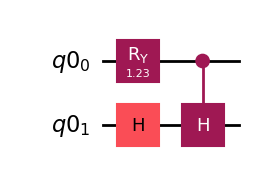

In [2]:
qr = QuantumRegister(2)     # taka lista
qc = QuantumCircuit(qr)

qc.ry(2 * atan(1 / sqrt(2)), qr[0])
qc.h(qr[1])                 # wybieramy gdzie władować bramkę
qc.ch(qr[0], qr[1])

qc.draw('mpl')

In [3]:
state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

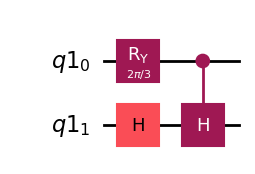

In [4]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.ry(2 * pi / 3, qr[0])
qc.h(qr[1])
qc.ch(qr[0], qr[1])

qc.draw('mpl')

In [5]:
state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

## Zadanie 2

Za pomocą wybranego  przez siebie przykładowego obwodu kwantowego należy zademonstrować za pomocą qiskita i wyjasnić w jaki sposób otrzymujemy i skąd się biorą różnice pomiędzy:
1. dokładnymi, wyliczonymi prawdopodobieństwami
2. histogramem  otrzymanym przez próbkowanie zgodnie z prawdopodobieństwami otrzymanymi z wybranego symulatora 
3. histogramem z prawdziwego urządzenia kwantowego

- Dokładne obliczenia precyzyjnie wyliczają prawdopodobieństwa
- Symulatory generują wyniki, próbkując zgodnie z obliczonymi prawdopodobieństwami
- Na rzeczywiste urządzenia wpływają zjawiska takie jak szumy

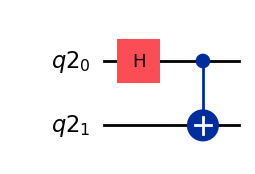

In [6]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

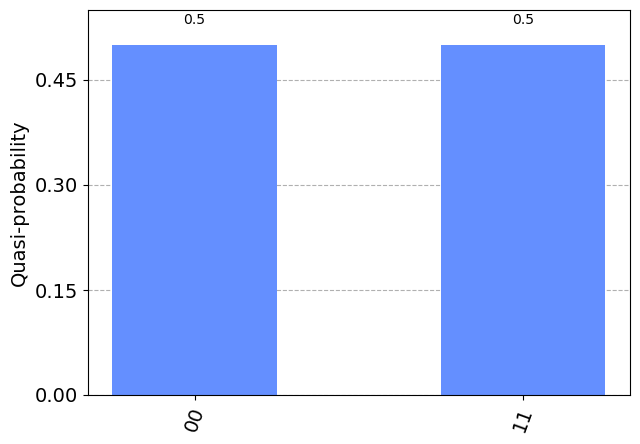

In [7]:
state = Statevector.from_instruction(qc)
ideal = state.probabilities_dict()
plot_histogram(ideal)

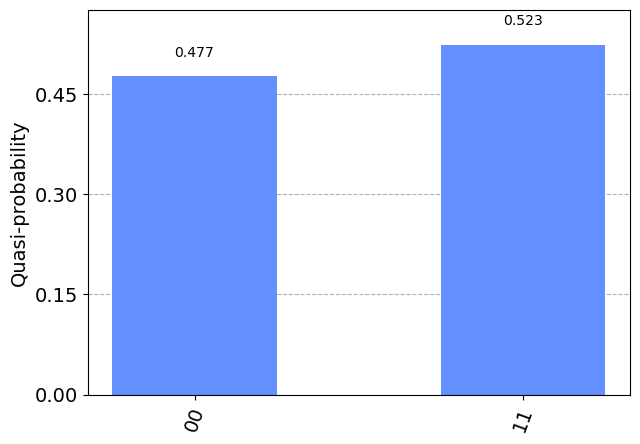

In [8]:
qc.measure_all()
sampled = PSampler() \
    .run(qc, shots= 128) \
    .result() \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(sampled)

In [9]:
QiskitRuntimeService.save_account(
    overwrite=True,
    channel = 'ibm_quantum',
    instance = 'ibm-q/open/main',
    token = 'c28b227c5bf5121c9254b5c727cd2044df1e22e3eebba036f21c4ebdd31c323ada5f9350fa1f240f2110e00fe63d03f7271a51cb35c2789aed253c5414433839')

In [21]:
service = QiskitRuntimeService()
backend = service.backend('ibm_osaka')

t_qc = transpile(qc, backend, optimization_level=3, seed_transpiler=0)

In [58]:
# with Batch(service=service, backend=backend):
#     sampler = Sampler()
#     job = sampler.run(
#         circuits=[t_qc],
#         shots=128)

In [24]:
result_sim = service.job('co21mt6h1p25p1m5fr1g').result()
real = result_sim \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(real)

TypeError: JSONDecoder.__init__() got an unexpected keyword argument 'encoding'

## Zadanie 3

Zademonstrować przykładową różnicę pomiędzy:
1. obwodem użytkownika
2. obwodem otrzymanym z transpilera dla wybranego urządzenia kwantowego


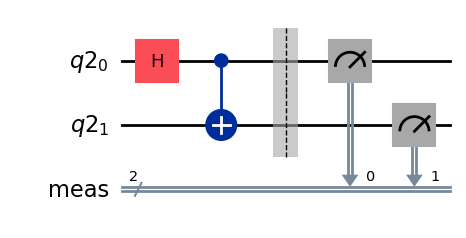

In [12]:
qc.draw('mpl')

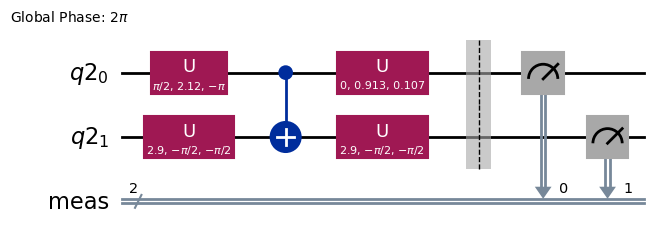

In [13]:
t_qc.draw('mpl')

In [23]:
with Batch(service=service, backend=service.backend('ibmq_qasm_simulator')):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
    
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[t_qc],
        shots=100,
    )
    result_dev = job.result()

TypeError: JSONDecoder.__init__() got an unexpected keyword argument 'encoding'

In [15]:
binary_prob = [sampled, result_sim.quasi_dists[0].binary_probabilities(), result_dev.quasi_dists[0].binary_probabilities()]
plot_histogram(
    binary_prob,
    bar_labels=False,
    legend=[
        "ideal distribution",
        "ibmq_qasm_simulator",
        "real device",
    ],
)

NameError: name 'result_sim' is not defined